In [1]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
single_image = x_train[0]

In [5]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
single_image.shape

(28, 28)

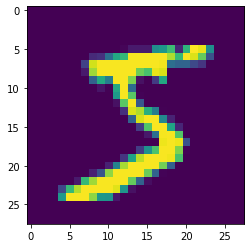

In [7]:
plt.imshow(single_image)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
from keras.utils.np_utils import to_categorical

In [11]:
y_train.shape

(60000,)

In [12]:
y_example = to_categorical(y_train)

In [13]:
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [14]:
y_example.shape

(60000, 10)

In [15]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
y_cat_test = to_categorical(y_test,10)

In [17]:
y_cat_train = to_categorical(y_train,10)

In [18]:
single_image.max()

255

In [19]:
single_image.min()

0

In [20]:
x_train = x_train/255
x_test = x_test/255

In [21]:
scaled_single = x_train[0]

In [22]:
scaled_single.max()

1.0

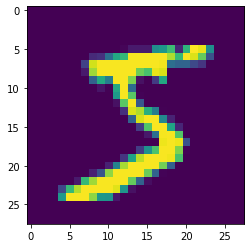

In [23]:
plt.imshow(scaled_single)

In [24]:
x_train.shape

(60000, 28, 28)

In [25]:
x_test.shape

(10000, 28, 28)

Reshape to include channel dimension (in this case, 1 channel)

In [26]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [27]:
x_train.shape

(60000, 28, 28, 1)

In [28]:
x_test = x_test.reshape(10000,28,28,1)

In [29]:
x_test.shape

(10000, 28, 28, 1)

# Training the Model

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [31]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

## Train the Model

In [33]:
# THIS WILL TAKE AWHILE ON MOST COMPUTERS!!!
# CHANGE NUMBER OF EPOCHS IF NECESSARY
# YOUR ACCURACY MAY ALSO BE LOWER THAN WHAT IS SHOWN HERE SINCE THIS WAS TRAINED ON GPU
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 43s 22ms/step - loss: 0.1348 - accuracy: 0.9597
Epoch 2/2
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0472 - accuracy: 0.9862


## Evaluate the Model

In [34]:
model.metrics_names

['loss', 'accuracy']

In [35]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0502 - accuracy: 0.9835


[0.05021154135465622, 0.9835000038146973]

In [36]:
from sklearn.metrics import classification_report

In [40]:
predictions = (model.predict(x_test) > 0.5).astype("int32")

313/313 [==============================] - 2s 6ms/step


In [47]:
y_cat_test.shape

(10000, 10)

In [48]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [49]:
predictions[0]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [50]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [52]:
print(classification_report(y_test,predictions,labels=np.unique(y_pred))


SyntaxError: unexpected EOF while parsing (411794375.py, line 1)

Looks like the CNN performed quite well!